## 提纲

本次实验课的主要内容有
- 简要介绍nltk
- 简要介绍gensim
- 通过以下三种方法实现一个简单的情感分类器
    - ngram特征+朴素贝叶斯
    - 情感词典
    - 词向量+SVM

## 1.1 NLTK

NLTK的全称是Natural Language Toolkit，是一个非常经典的自然语言处理工具。

官网：http://www.nltk.org/

NLTK可以处理自然语言处理中的绝大多数基础任务，并包含50多种常用语料库。

- tokenize
- 词性标注
- 词形还原
- 词干提取
- 句法解析
- 停用词
- wordnet
- ...


### Tokenize

首先来看NLP处理中最基本的步骤，做分词。我们对下面这句话最分词：

In [1]:
my_string = "Two plus two is four, minus one that's three — quick maths. Every day man's on the block. Smoke trees. See your girl in the park, that girl is an uckers. When the thing went quack quack quack, your men were ducking! Hold tight Asznee, my brother. He's got a pumpy. Hold tight my man, my guy. He's got a frisbee. I trap, trap, trap on the phone. Moving that cornflakes, rice crispies. Hold tight my girl Whitney."
my_string

"Two plus two is four, minus one that's three — quick maths. Every day man's on the block. Smoke trees. See your girl in the park, that girl is an uckers. When the thing went quack quack quack, your men were ducking! Hold tight Asznee, my brother. He's got a pumpy. Hold tight my man, my guy. He's got a frisbee. I trap, trap, trap on the phone. Moving that cornflakes, rice crispies. Hold tight my girl Whitney."

**使用python最基础的分词方法来对下面这句话做分词**

In [2]:
tokenized_by_space = my_string.split()
print(tokenized_by_space)

['Two', 'plus', 'two', 'is', 'four,', 'minus', 'one', "that's", 'three', '—', 'quick', 'maths.', 'Every', 'day', "man's", 'on', 'the', 'block.', 'Smoke', 'trees.', 'See', 'your', 'girl', 'in', 'the', 'park,', 'that', 'girl', 'is', 'an', 'uckers.', 'When', 'the', 'thing', 'went', 'quack', 'quack', 'quack,', 'your', 'men', 'were', 'ducking!', 'Hold', 'tight', 'Asznee,', 'my', 'brother.', "He's", 'got', 'a', 'pumpy.', 'Hold', 'tight', 'my', 'man,', 'my', 'guy.', "He's", 'got', 'a', 'frisbee.', 'I', 'trap,', 'trap,', 'trap', 'on', 'the', 'phone.', 'Moving', 'that', 'cornflakes,', 'rice', 'crispies.', 'Hold', 'tight', 'my', 'girl', 'Whitney.']


**使用nltk的分词器来对下面这句话做分词**

In [9]:
# from nltk.tokenize import word_tokenize
import nltk
tokenized_by_nltk = nltk.word_tokenize(my_string)

print(tokenized_by_nltk)

['Two', 'plus', 'two', 'is', 'four', ',', 'minus', 'one', 'that', "'s", 'three', '—', 'quick', 'maths', '.', 'Every', 'day', 'man', "'s", 'on', 'the', 'block', '.', 'Smoke', 'trees', '.', 'See', 'your', 'girl', 'in', 'the', 'park', ',', 'that', 'girl', 'is', 'an', 'uckers', '.', 'When', 'the', 'thing', 'went', 'quack', 'quack', 'quack', ',', 'your', 'men', 'were', 'ducking', '!', 'Hold', 'tight', 'Asznee', ',', 'my', 'brother', '.', 'He', "'s", 'got', 'a', 'pumpy', '.', 'Hold', 'tight', 'my', 'man', ',', 'my', 'guy', '.', 'He', "'s", 'got', 'a', 'frisbee', '.', 'I', 'trap', ',', 'trap', ',', 'trap', 'on', 'the', 'phone', '.', 'Moving', 'that', 'cornflakes', ',', 'rice', 'crispies', '.', 'Hold', 'tight', 'my', 'girl', 'Whitney', '.']


**同理，可以用nltk实现分句**

In [10]:
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(my_string)
sentences

["Two plus two is four, minus one that's three — quick maths.",
 "Every day man's on the block.",
 'Smoke trees.',
 'See your girl in the park, that girl is an uckers.',
 'When the thing went quack quack quack, your men were ducking!',
 'Hold tight Asznee, my brother.',
 "He's got a pumpy.",
 'Hold tight my man, my guy.',
 "He's got a frisbee.",
 'I trap, trap, trap on the phone.',
 'Moving that cornflakes, rice crispies.',
 'Hold tight my girl Whitney.']

**做一个词频统计**

词频（term frequency，TF）指的是某一个给定的词语在语料库中出现的次数。
词频信息是反映语料库特征一个的基本统计量。
- 政府工作报告中的高频词
- 使用词频推断红楼梦后40回是否为续写
- 通过词频的变化来观察社会的变迁
- 英语考试中重点词汇


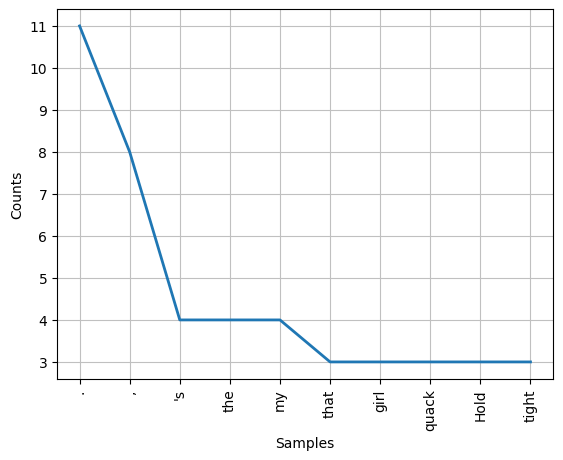

<Axes: xlabel='Samples', ylabel='Counts'>

In [11]:
from nltk import FreqDist

fdist = FreqDist(tokenized_by_nltk)
fdist.plot(10)

### 词性标注, 词形还原，词干提取


In [13]:
from nltk import pos_tag

# sentences是刚才使用句子级别分词器分好的句子
first_sentence = sentences[0]
# 使用词级别分词器进行分词
first_sentence_tokenized = word_tokenize(first_sentence)
# 进行词性标注
pos_result = pos_tag(first_sentence_tokenized)

pos_result

[('Two', 'CD'),
 ('plus', 'CC'),
 ('two', 'CD'),
 ('is', 'VBZ'),
 ('four', 'CD'),
 (',', ','),
 ('minus', 'CC'),
 ('one', 'CD'),
 ('that', 'WDT'),
 ("'s", 'VBZ'),
 ('three', 'CD'),
 ('—', 'NNP'),
 ('quick', 'JJ'),
 ('maths', 'NNS'),
 ('.', '.')]

In [15]:
import nltk
nltk.help.upenn_tagset('JJ')

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


In [16]:
# 词干提取 stemming

# from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

snowball = SnowballStemmer('english')

print(snowball.stem('testing'))
print(snowball.stem('tested'))

test
test


In [18]:
# 词形还原 lemmatizing

from nltk import WordNetLemmatizer

wnl = WordNetLemmatizer()

print(wnl.lemmatize('brightening'))
print(wnl.lemmatize('boxes'))
print(wnl.lemmatize('brightening', pos='v'))

brightening
box
brighten


## 情感分类

In [20]:
from nltk.corpus import movie_reviews
import random
random.seed(42)


def load_movie_reviews():
    # 取出正负样本的标号
    pos_ids = movie_reviews.fileids('pos')
    neg_ids = movie_reviews.fileids('neg')
    
    # 构建数据集
    all_reviews = []
    for pids in pos_ids:
        all_reviews.append((movie_reviews.raw(pids), 'positive'))
    
    for nids in neg_ids:
        all_reviews.append((movie_reviews.raw(nids), 'negative'))
        
    # 随机打乱
    random.shuffle(all_reviews)
    
    # 切分训练集和测试集
    train_reviews = all_reviews[:1600]
    test_reviews = all_reviews[1600:]

    return train_reviews, test_reviews

train_reviews, test_reviews = load_movie_reviews()
print('train:', len(train_reviews))
print('test:', len(test_reviews))

train: 1600
test: 400


In [10]:
# 查看一个训练样例
train_reviews[2]

("saving private ryan ( dreamworks ) running time : 2 hours 48 minutes . \nstarring tom hanks , edward burns , tom sizemore and matt damon directed by steven spielberg already being hailed as the 'greatest war movie ever made , ' saving private ryan is an harrowing , saddening and riveting movie . \nit may not be the greatest war movie in my opinion , but it's certainly one of the best war movies made , and one of the best of 1998 . \ntom hanks stars as a captain who's troop has to find private ryan ( damon ) who has a ticket home because his three brothers have been killed in action . \naction , drama and even some humour occur as the troop journeys through wartime france to find him . \nafter the disappointing amistad ( 1997 ) spielberg has returned to form with this excellent movie . \ni'm not the war movie genre biggest fan , but i found this film to be gripping , and very scary , thanks to the excellent cast , direction and terrifying battle scenes . \ntom hanks is superb , strayi

In [21]:
# 尝试构建第一个特征抽取器 把每一个词都看作一个特征
def extract_feature1(text):
    feature = {}
    text = text.lower()
    for word in word_tokenize(text):
        feature[f'contain: {word}'] = True
    return feature

In [22]:
extract_feature1(train_reviews[2][0])

{'contain: saving': True,
 'contain: private': True,
 'contain: ryan': True,
 'contain: (': True,
 'contain: dreamworks': True,
 'contain: )': True,
 'contain: running': True,
 'contain: time': True,
 'contain: :': True,
 'contain: 2': True,
 'contain: hours': True,
 'contain: 48': True,
 'contain: minutes': True,
 'contain: .': True,
 'contain: starring': True,
 'contain: tom': True,
 'contain: hanks': True,
 'contain: ,': True,
 'contain: edward': True,
 'contain: burns': True,
 'contain: sizemore': True,
 'contain: and': True,
 'contain: matt': True,
 'contain: damon': True,
 'contain: directed': True,
 'contain: by': True,
 'contain: steven': True,
 'contain: spielberg': True,
 'contain: already': True,
 'contain: being': True,
 'contain: hailed': True,
 'contain: as': True,
 'contain: the': True,
 "contain: 'greatest": True,
 'contain: war': True,
 'contain: movie': True,
 'contain: ever': True,
 'contain: made': True,
 "contain: '": True,
 'contain: is': True,
 'contain: an': Tru

In [23]:
from nltk import NaiveBayesClassifier
import nltk

def train_and_test(extract_feature, train_data, test_data):
    training_set = nltk.classify.apply_features(extract_feature, train_data)
    test_set = nltk.classify.apply_features(extract_feature, test_data)

    classifier = NaiveBayesClassifier.train(training_set)
    accuracy = nltk.classify.util.accuracy(classifier, test_set)
    print(f'accuracy is {accuracy:.4f}')

    return classifier


In [24]:
model1 = train_and_test(extract_feature1, train_reviews, test_reviews)

accuracy is 0.7450


In [25]:
model1.show_most_informative_features()

Most Informative Features
          contain: sucks = True           negati : positi =     15.1 : 1.0
       contain: nonsense = True           negati : positi =     13.1 : 1.0
     contain: astounding = True           positi : negati =     11.6 : 1.0
    contain: outstanding = True           positi : negati =     11.6 : 1.0
      contain: stupidity = True           negati : positi =     11.1 : 1.0
      contain: atrocious = True           negati : positi =     11.1 : 1.0
         contain: seagal = True           negati : positi =     10.4 : 1.0
         contain: avoids = True           positi : negati =     10.3 : 1.0
         contain: finest = True           positi : negati =      9.8 : 1.0
       contain: one-note = True           negati : positi =      9.7 : 1.0


In [26]:
sentence = 'it is a wonderful movie'
feature = extract_feature1(sentence)

model1.classify(feature)

'positive'

In [27]:
# 只考虑形容词

def extract_feature2(text):
    text = text.lower()
    feature = {}
    tokens = word_tokenize(text)
    for word, pos in pos_tag(tokens):
        if pos == 'JJ':
            feature[f'contain: {word}'] = True
    return feature

In [18]:
# extract_feature2(train_reviews[2][0])

In [28]:
model2 = train_and_test(extract_feature2, train_reviews, test_reviews)

accuracy is 0.7250


思考：该分类器性能不行？

In [29]:
model2.show_most_informative_features()

Most Informative Features
    contain: outstanding = True           positi : negati =     11.6 : 1.0
      contain: atrocious = True           negati : positi =     11.1 : 1.0
       contain: one-note = True           negati : positi =      9.7 : 1.0
      contain: ludicrous = True           negati : positi =      9.6 : 1.0
          contain: fairy = True           positi : negati =      9.6 : 1.0
     contain: unbearable = True           negati : positi =      9.0 : 1.0
          contain: worst = True           negati : positi =      9.0 : 1.0
         contain: truman = True           positi : negati =      9.0 : 1.0
     contain: accessible = True           positi : negati =      8.3 : 1.0
       contain: seamless = True           positi : negati =      8.3 : 1.0


In [21]:
# 利用bigram

from nltk import ngrams


def extract_feature3(text):
    text = text.lower()
    feature = {}
    tokens = word_tokenize(text)
    for word in tokens:
        feature[f'contain: {word}'] = True
    for bigram in ngrams(tokens, 2):
        bigram = ' '.join(bigram)
        feature[bigram] = True
    return feature

In [22]:
model3 = train_and_test(extract_feature3, train_reviews, test_reviews)

accuracy is 0.7775


In [23]:
model3.show_most_informative_features(20)

Most Informative Features
          contain: sucks = True           negati : positi =     15.1 : 1.0
       contain: nonsense = True           negati : positi =     13.1 : 1.0
                to waste = True           negati : positi =     13.1 : 1.0
              matt damon = True           positi : negati =     12.3 : 1.0
               insult to = True           negati : positi =     11.7 : 1.0
            saving grace = True           negati : positi =     11.7 : 1.0
               . cameron = True           positi : negati =     11.6 : 1.0
     contain: astounding = True           positi : negati =     11.6 : 1.0
              fairy tale = True           positi : negati =     11.6 : 1.0
                 our own = True           positi : negati =     11.6 : 1.0
    contain: outstanding = True           positi : negati =     11.6 : 1.0
      contain: stupidity = True           negati : positi =     11.1 : 1.0
                  so why = True           negati : positi =     11.1 : 1.0

## 进一步的改进
- 特征选择
    - ngram会使得特征空间的大小快速增加
    - 特征选择旨在初步剔除那些对分类无益的特征
- 考虑词频信息，如TF-IDF
    - 特征从一个词是否出现，变为这个词出现了多少次。特征的信息含量增加。
- 处理否定词
    - 将否定词+形容词，变为一个新的词
    - 'not good' -> NOT_good
- ...